In [7]:
import os
os.environ["ML_DATA_PATH"] ="/home/jbs47/MLSALT4/nips14-ssl/data"

In [8]:
# Check that the variable was correctly set
! echo $ML_DATA_PATH

/home/jbs47/MLSALT4/nips14-ssl/data


In [9]:
! ls

12ss3000.log	   preprocessing.py		run_m12ss3000.sh
Icon?		   preprocessing.pyc		run_m12ss600.log
LICENSE		   reproduce.ipynb		run_m12ss600.sh
README.md	   results			run_m2.log
adam.py		   results_v0			run_m2.sh
adam.pyc	   run_2layer_ssl.py		run_m2fs.log
anglepy		   run_alpha02_3000.log		run_m2fs.sh
data		   run_alpha05_3000.log		run_sl.py
exp_ssl.py	   run_analogies.py		run_tsvm.py
gpulearn_yz_x.py   run_flying.py		save_figure
gpulearn_yz_x.pyc  run_gpulearn_yz_x.py		setup_env.sh
gpulearn_z_x.py    run_gpulearn_yz_x_mnist.log	test.sh
gpulearn_z_x.pyc   run_gpulearn_yz_x_norb.log	test_gpu.py
learn_yz_x_ss.py   run_gpulearn_z_x.py		tmp.log
learn_yz_x_ss.pyc  run_m1.log			tmp.py
mnistmodels	   run_m1.sh			tmptest
models		   run_m12ss100.sh		train_and_test.log
nohup.out	   run_m12ss1000.log
poster_results	   run_m12ss1000.sh


Try testing the proved M1+M2 model:

In [23]:
! python run_sl.py mnist

Traceback (most recent call last):
  File "run_sl.py", line 31, in <module>
    ndict.set_value(model.v, ndict.loadz(dir+'v.ndict.tar.gz'))
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/ndict.py", line 167, in set_value
    return {i: d[i].set_value(d2[i]) for i in d}
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/ndict.py", line 167, in <dictcomp>
    return {i: d[i].set_value(d2[i]) for i in d}
  File "/remote/mlsalt-2016/jbs47/kerastheano/local/lib/python2.7/site-packages/theano/compile/sharedvalue.py", line 127, in set_value
    self.container.value = copy.deepcopy(new_value)
  File "/remote/mlsalt-2016/jbs47/kerastheano/local/lib/python2.7/site-packages/theano/gof/link.py", line 468, in __set__
    self.storage[0] = self.type.filter(value, **kwargs)
  File "/remote/mlsalt-2016/jbs47/kerastheano/local/lib/python2.7/site-packages/theano/tensor/type.py", line 139, in filter
    raise TypeError(err_msg, data)
TypeError: ('TensorType(float32, matrix) cannot

Train the M1 model with just 2 iterations:

In [75]:
! THEANO_FLAGS=floatX=float32 python run_gpulearn_z_x.py mnist

Traceback (most recent call last):
  File "run_gpulearn_z_x.py", line 1, in <module>
    import gpulearn_z_x
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/gpulearn_z_x.py", line 8, in <module>
    import anglepy as ap
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/__init__.py", line 1, in <module>
    from anglepy.BNModel import *
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/BNModel.py", line 2, in <module>
    import theano
ImportError: No module named theano


Train the M1+M2 model with just 2 iterations:

In [38]:
!  python run_2layer_ssl.py 600 1


Usage: python [this_script.py] [n_labels] [seed]
n_labels: 600
seed: 1
logdir: results/learn_yz_x_ss_mnist_2layer_50-(500, 500)_nlabeled600_alpha0.1_seed1_-1488227057/
run_2layer_ssl.py 600 50 (500, 500) mnist_2layer 1 
177.627851009 0 88.1500935205 0.9038 0.8987
348.281799078 1 88.0610046735 0.9006 0.9006


In [40]:
! python run_sl.py mnist

(50, 10000)
Computing class posteriors using a marginal likelihood estimate with importance sampling using  3  samples.
This is slow, but could be sped up significantly by fitting a classifier to match the posteriors (of the generative model) in the training set.
For MNIST, this should converge to ~ 0.96 % error.
^C


# Semi-superviesd models

## Training M2 models

TODO: Skip that for now, more important to have mutlipel runs of the stacked.

## Multiple runs of the M1 + M2 model

In [ ]:
   PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND
111007 jbs47     20   0  0.284t 865784 100432 R  1706  0.3  55966:55 python
 82581 jbs47     20   0  0.284t 863016 100432 R  1480  0.3  51558:00 python
111088 jbs47     20   0  0.284t 865328 100432 R  1415  0.3  55964:12 python
121532 jbs47     20   0  0.282t 712068  96164 R  99.9  0.3  82:11.70 python
 82259 sp838     20   0  364816  57324   7268 S   1.0  0.0   0:17.61 jupyter-noteb

These three long runnign are:

drwxr-xr-x 2 jbs47 mlsltm16   4096 Mar  9 00:50 learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.2_seed1_-1488809906

drwxr-xr-x 2 jbs47 mlsltm16   4096 Mar  9 00:51 learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.5_seed1_-1488809959

drwxr-xr-x 2 jbs47 mlsltm16   4096 Mar  9 00:51 learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.5_seed1_-1488821707

Running with different seeds

## 100 labels

Seed 1

In [353]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed1_-1488578565/hook.txt'
! tail {path}
! ls -l {path}

164276.870054 2990 71.393621764 0.0318 0.0341
164330.976694 2991 71.4148214304 0.0317 0.0341
164383.422019 2992 71.4353877784 0.032 0.0347
164437.143856 2993 71.4400515827 0.0312 0.0334
164489.037069 2994 71.4203019368 0.0311 0.0349
164542.034467 2995 71.4404737652 0.0303 0.0332
164595.978744 2996 71.4456724322 0.0308 0.0339
164651.040265 2997 71.4405373793 0.0308 0.0342
164705.906807 2998 71.4025304521 0.0331 0.0355
164757.768602 2999 71.4149939249 0.0322 0.0348
-rw-r--r-- 1 jbs47 mlsltm16 138058 Mar  5 19:48 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.1_seed1_-1488578565/hook.txt


0.0444


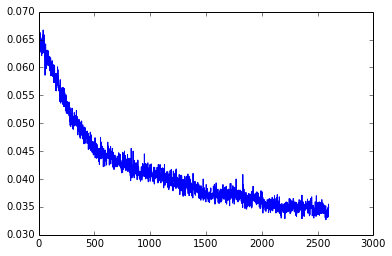

In [354]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
data100 = []
data100.append(data)
print data[1000]
plt.show()

Seed 2 (PID 52004) cpu2 killed

In [28]:
# nohup python run_2layer_ssl.py 100 2 > m12ss100_seed2.log &

In [355]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed2_-1489085316/hook.txt'
! tail {path}
! ls -l {path}

192291.511925 1500 71.4977272187 0.0419 0.0436
192420.639023 1501 71.5460259338 0.0424 0.0432
192548.268631 1502 71.5121567008 0.0404 0.0415
192665.161758 1503 71.5319504028 0.0417 0.0432
192791.783455 1504 71.5503322775 0.0421 0.0439
192907.324255 1505 71.5356984642 0.0417 0.0436
193041.162798 1506 71.5038949715 0.042 0.0445
193170.79677 1507 71.558786154 0.0419 0.0432
193296.941572 1508 71.5305957683 0.041 0.0433
193416.554731 1509 71.5632413068 0.0418 0.0435
-rw-r--r-- 1 jbs47 mlsltm16 68960 Mar 12 00:32 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.1_seed2_-1489085316/hook.txt


0.0463


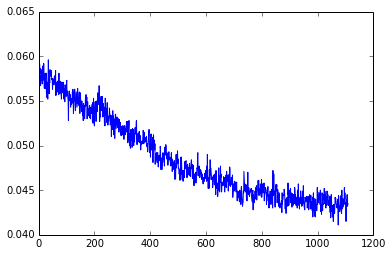

In [356]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
data100.append(data)
print data[1000]
plt.show()

Seed 3 (PID 52177): cpu2: killed

In [35]:
# nohup python run_2layer_ssl.py 100 3 > m12ss100_seed3.log

In [357]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed3_-1489085383/hook.txt'
! tail {path}
! ls -l {path}

192378.374684 1499 71.5709890317 0.0466 0.0455
192492.163815 1500 71.5834970869 0.0492 0.0459
192613.637273 1501 71.5268041817 0.049 0.0463
192734.384194 1502 71.551103461 0.0473 0.0463
192856.197532 1503 71.6051935003 0.0499 0.0474
192987.902077 1504 71.5857032621 0.0502 0.0481
193118.231732 1505 71.5172587282 0.0483 0.0463
193246.339861 1506 71.5581946556 0.0489 0.0482
193374.053344 1507 71.5357400933 0.0487 0.0473
193432.567333 1508 71.5620478359 0.0478 0.0464
-rw-r--r-- 1 jbs47 mlsltm16 68854 Mar 12 00:33 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.1_seed3_-1489085383/hook.txt


0.0498


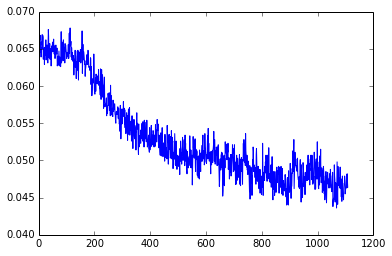

In [358]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
plt.plot(data[400:])
data100.append(data)
print data[1000]
plt.show()

In [368]:
len(data100)
vals = []
for i in xrange(3):
    vals.append(float(data100[i][1000]))
print vals
print np.mean(vals)
print np.std(vals)

[0.0444, 0.0463, 0.0498]
0.0468333333333
0.0022365648263


## 600 labels

In [414]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled600_alpha0.1_seed1_-1488586063/hook.txt'
! tail {path}
! ls -l {path}

236996.3632 2990 72.7972514237 0.0227 0.0233
237063.750047 2991 72.7661236486 0.0223 0.0226
237133.014528 2992 72.7710335677 0.023 0.0233
237201.481931 2993 72.8067713147 0.0239 0.024
237269.470053 2994 72.7863078113 0.0221 0.0227
237335.376728 2995 72.8056606295 0.0224 0.0221
237403.708779 2996 72.7612009359 0.0224 0.0231
237470.804784 2997 72.7216746197 0.0226 0.023
237538.216696 2998 72.7409599921 0.0228 0.0228
237606.592447 2999 72.7864682098 0.0223 0.0235
-rw-r--r-- 1 jbs47 mlsltm16 138275 Mar  6 18:08 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled600_alpha0.1_seed1_-1488586063/hook.txt


0.024


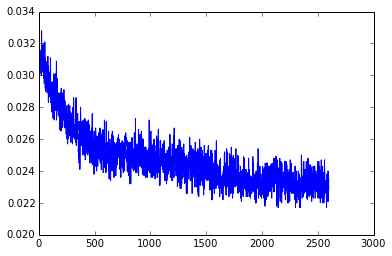

In [415]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
data600 = []
data600.append(data[1000])
print data[1000]
plt.plot(data[400:])
plt.show()

Seed 2: (PID 52240) cpu2 - killed

In [ ]:
# nohup python run_2layer_ssl.py 600 2 > m12ss600_seed2.log &

In [416]:
path= 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled600_alpha0.1_seed2_-1489085492/hook.txt'
#path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.1_seed3_-1489085383/hook.txt'
! tail {path}
! ls -l {path}

191366.47639 917 72.9423009986 0.0241 0.0259
191587.86824 918 72.9945883925 0.0251 0.0269
191789.574537 919 72.9563246414 0.027 0.0278
191998.074405 920 72.9359589691 0.0253 0.026
192187.867344 921 72.9809557023 0.0245 0.0261
192388.477811 922 72.9801429818 0.0252 0.0264
192579.105297 923 72.9331684487 0.0247 0.0265
192769.739232 924 72.9928587268 0.0263 0.0273
192977.180222 925 72.9899977907 0.0247 0.0255
193179.044272 926 72.9674605589 0.0257 0.0258
-rw-r--r-- 1 jbs47 mlsltm16 41957 Mar 12 00:31 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled600_alpha0.1_seed2_-1489085492/hook.txt


0.0258


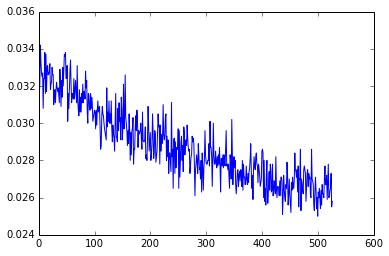

In [417]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
data600.append(data[926])
print data[926]
plt.plot(data[400:])
plt.show()

Seed 3, PID 52307 cpu2 - killss

In [ ]:
# nohup python run_2layer_ssl.py 600 3 > m12ss600_seed3.log &

In [455]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled600_alpha0.1_seed3_-1489085694/hook.txt'
! tail {path}
! ls -l {path}

274281.149502 1911 72.8642381255 0.0234 0.0231
274365.455381 1912 72.845699605 0.0235 0.0238
274485.63131 1913 72.8189298918 0.0233 0.0238
274598.582851 1914 72.8134111531 0.0229 0.0232
274754.231946 1915 72.8636661566 0.0237 0.0244
274897.923579 1916 72.8718262209 0.0235 0.0239
275026.666817 1917 72.8434805337 0.0232 0.0238
275174.199482 1918 72.8556861019 0.0233 0.0234
275303.624809 1919 72.8312000623 0.0234 0.023
275427.16113 1920 72.8401214779 0.0229 0.023
-rw-r--r-- 1 jbs47 mlsltm16 88175 Mar 12 23:25 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled600_alpha0.1_seed3_-1489085694/hook.txt


0.025


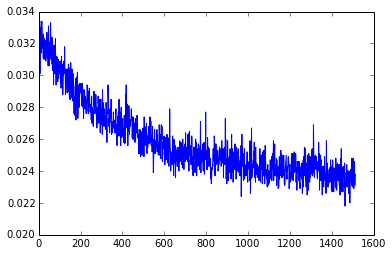

In [419]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
data600.append(data[1000])
print data[1000]
plt.plot(data[400:])
plt.show()

In [423]:
print len(data600)
print data600

3
['0.024', '0.0258', '0.025']


In [424]:
vals = []
for i in xrange(3):
    #val = sum([float(el) for el in data600[i]])
    vals.append(float(data600[i]))
print vals
print np.mean(vals)
print np.std(vals)

[0.024, 0.0258, 0.025]
0.0249333333333
0.000736357401146


## 1000 labels

Seed 1,  finished

In [488]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled1000_alpha0.1_seed1_-1488586240/hook.txt'
! tail {path}
! ls -l {path}

217140.845713 2990 72.7796634512 0.024 0.0221
217192.59125 2991 72.7657650082 0.0226 0.0231
217244.211284 2992 72.8077887388 0.0252 0.0233
217293.727213 2993 72.7492884587 0.0247 0.0227
217343.370791 2994 72.7780671843 0.024 0.022
217393.011452 2995 72.7897659339 0.0243 0.0235
217443.063142 2996 72.8103119414 0.0242 0.0224
217493.430806 2997 72.7771902466 0.0252 0.0231
217546.301756 2998 72.8417550364 0.0255 0.0228
217595.751569 2999 72.791896221 0.0248 0.022
-rw-r--r-- 1 jbs47 mlsltm16 138158 Mar  6 12:37 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled1000_alpha0.1_seed1_-1488586240/hook.txt


0.0238


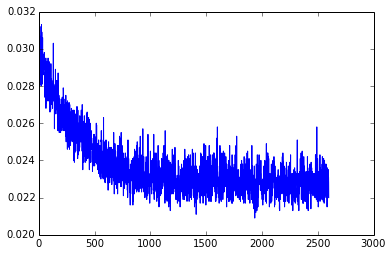

In [489]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
data1000 = []
data1000.append(data[1000])
print data[1000]
plt.plot(data[400:])
plt.show()

Seed 2, PID 105193 cpu1 - killed

In [ ]:
# nohup python run_2layer_ssl.py 1000 2 > m12ss1000_seed2.log &

In [490]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled1000_alpha0.1_seed2_-1489086004/hook.txt'
! tail {path}
! ls -l {path}

411899.934653 1365 72.8896514738 0.0241 0.0233
412220.538221 1366 72.909073956 0.0229 0.0225
412541.514728 1367 72.9148187444 0.0247 0.0239
412901.522344 1368 72.9054807065 0.0237 0.0242
413222.641978 1369 72.9120304809 0.0234 0.0223
413493.664725 1370 72.9110551996 0.0231 0.0238
413792.215775 1371 72.9114717467 0.023 0.0231
414081.370702 1372 72.8921673365 0.0257 0.0239
414431.943607 1373 72.8738014968 0.0237 0.0227
414745.160632 1374 72.8796955319 0.0241 0.0237
-rw-r--r-- 1 jbs47 mlsltm16 62869 Mar 14 14:12 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled1000_alpha0.1_seed2_-1489086004/hook.txt


0.0685


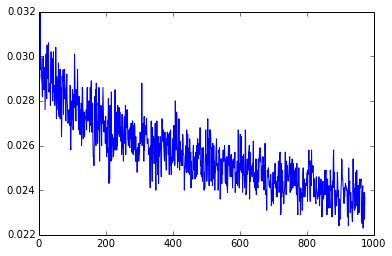

In [491]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
data1000.append(data[1000])
print data[100]
plt.plot(data[400:])
plt.show()

Seed 3, PID 106527 cpu1- killed

In [ ]:
# nohup python run_2layer_ssl.py 1000 3 > m12ss1000_seed3.log &

In [492]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled1000_alpha0.1_seed3_-1489086096/hook.txt'
! tail {path}
! ls -l {path}

412514.363238 1400 72.8668395173 0.0252 0.0281
412729.651712 1401 72.8709426405 0.0241 0.0271
412947.592602 1402 72.9059035138 0.0232 0.026
413163.560751 1403 72.8893060472 0.0247 0.0278
413369.417875 1404 72.8719921386 0.0244 0.027
413602.858308 1405 72.8862051725 0.024 0.0267
413848.272041 1406 72.9038202128 0.0229 0.0267
414066.189942 1407 72.846757497 0.0245 0.0268
414305.963699 1408 72.9027132784 0.0245 0.0272
414565.38154 1409 72.8774015893 0.0264 0.0282
-rw-r--r-- 1 jbs47 mlsltm16 64470 Mar 14 14:11 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled1000_alpha0.1_seed3_-1489086096/hook.txt


0.0289


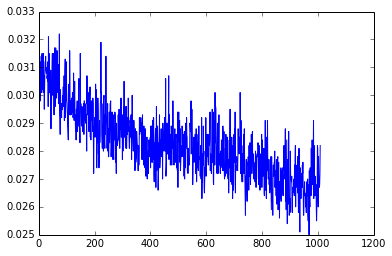

In [493]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
data1000.append(data[974])
print data[974]
plt.plot(data[400:])
plt.show()

In [494]:
vals = []
for i in xrange(3):
    #val = sum([float(el) for el in data600[i]])
    vals.append(float(data1000[i]))
print vals
print np.mean(vals)
print np.std(vals)

[0.0238, 0.0245, 0.0289]
0.0257333333333
0.00225733372711


## 3000 labels

In [441]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed1_-1488587057/hook.txt'
! tail {path}

213319.384093 2990 72.8102919374 0.0195 0.0196
213390.402177 2991 72.7835561121 0.0186 0.0195
213461.748811 2992 72.7821567583 0.0195 0.019
213532.512361 2993 72.8207197817 0.0197 0.0199
213602.723051 2994 72.809942807 0.019 0.0202
213673.341679 2995 72.7810810574 0.0194 0.0199
213744.804211 2996 72.8095860878 0.0188 0.0192
213814.786408 2997 72.8654309106 0.0195 0.0195
213885.498968 2998 72.8000426033 0.0201 0.0198
213954.68233 2999 72.8188849631 0.0203 0.0199


0.0229


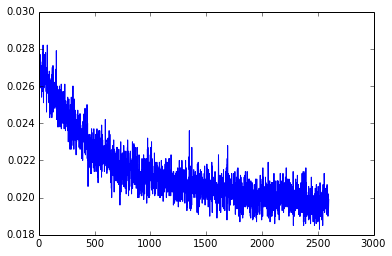

In [442]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
data3000 = []
data3000.append(data[1000])
print data[1000]
plt.plot(data[400:])
plt.show()

Seed 2, PID 106947 cpu1 - killed

In [ ]:
# nohup python run_2layer_ssl.py 3000 2 > m12ss3000_seed2.log &

In [495]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed2_-1489086138/hook.txt
! ls -l results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed2_-1489086138/hook.txt

415110.63016 1348 72.8977435324 0.0208 0.0206
415260.570973 1349 72.9105186908 0.0217 0.0226
415414.009281 1350 72.9262742232 0.0213 0.0207
415592.122116 1351 72.9142620969 0.0222 0.0219
415756.010166 1352 72.9184676156 0.0218 0.021
415901.37173 1353 72.9243474822 0.0213 0.0208
416049.014349 1354 72.8713253246 0.0211 0.0209
416193.20458 1355 72.8692205628 0.0211 0.0205
416332.891821 1356 72.8948160493 0.0221 0.0214
416484.971031 1357 72.9019829255 0.0223 0.0213
-rw-r--r-- 1 jbs47 mlsltm16 62069 Mar 14 14:43 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.1_seed2_-1489086138/hook.txt


0.0223


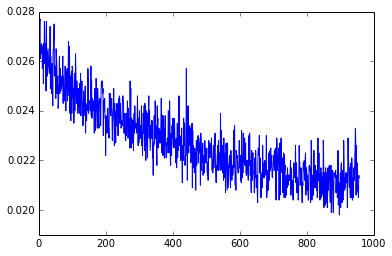

In [496]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed2_-1489086138/hook.txt | awk '{print $5}'
data3000.append(data[868])
print data[868]
plt.plot(data[400:])
plt.show()

Seed 3, PID 107381 cpu1 - killed

In [ ]:
# nohup python run_2layer_ssl.py 3000 3 > m12ss3000_seed3.log &

In [499]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed3_-1489086181/hook.txt

415138.810073 1387 72.9434117003 0.0208 0.0205
415291.958271 1388 72.9232223859 0.0224 0.0229
415463.758071 1389 72.8617053506 0.0219 0.0218
415626.558247 1390 72.8945428964 0.0225 0.0224
415787.378108 1391 72.9222816359 0.0224 0.0224
415933.471187 1392 72.8883361947 0.0226 0.0226
416074.889083 1393 72.8595092808 0.0224 0.0215
416219.938044 1394 72.9146469381 0.0218 0.0223
416357.257652 1395 72.8868509943 0.0226 0.0216
416508.839112 1396 72.9062112271 0.0224 0.0222


0.023


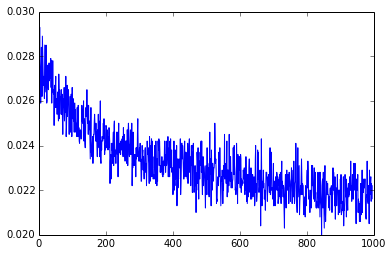

In [500]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.1_seed3_-1489086181/hook.txt | awk '{print $5}'
data3000.append(data[908])
print data[908]
plt.plot(data[400:])
plt.show()

In [450]:
vals = []
for i in xrange(3):
    #val = sum([float(el) for el in data600[i]])
    vals.append(float(data3000[i]))
print vals
print np.mean(vals)
print np.std(vals)

[0.0229, 0.0223, 0.023]
0.0227333333333
0.000309120616517


## 3000 labels alphas

### Alpha 0.2

In [451]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.2_seed1_-1488809906/hook.txt

209806.864213 1635 72.8573913744 0.0207 0.019
209951.600566 1636 72.8943217649 0.0203 0.0207
210074.872009 1637 72.8849973783 0.0198 0.0198
210200.638269 1638 72.8645671383 0.02 0.0183
210332.231063 1639 72.8756832648 0.0197 0.0196
210445.29427 1640 72.8616483216 0.0197 0.0199
210577.79327 1641 72.8440176413 0.02 0.0195
210696.071806 1642 72.8616574953 0.0202 0.02
210822.334378 1643 72.9000009615 0.0194 0.0176
210944.87134 1644 72.8733546431 0.0207 0.0196


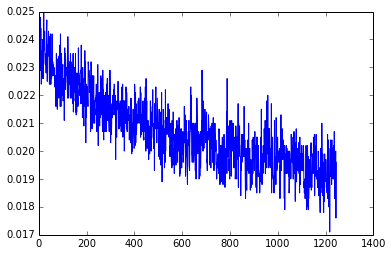

In [452]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.2_seed1_-1488809906/hook.txt | awk '{print $5}'
plt.plot(data[400:])
plt.show()

In [ ]:
# nohup python run_2layer_ssl.py 3000 2 > run_alpha05_3000_seed2.log &

PID 71283: cpu2 - killed=

221321.835407 800 73.2437323853 0.0243 0.0272
221566.306358 801 73.3004757678 0.0239 0.0261
221749.801015 802 73.2462970881 0.024 0.0251
221926.628022 803 73.2498771928 0.0238 0.0251
222112.592717 804 73.2865261096 0.0244 0.0256
222310.976915 805 73.2714568436 0.0245 0.0256
222490.790623 806 73.2513628168 0.0244 0.0255
222676.431915 807 73.2482737469 0.0241 0.0251
222871.700673 808 73.2204983459 0.0256 0.0263
223066.704178 809 73.2800326963 0.024 0.025
-rw-r--r-- 1 jbs47 mlsltm16 36698 Mar 14 15:09 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.2_seed2_-1489281049/hook.txt


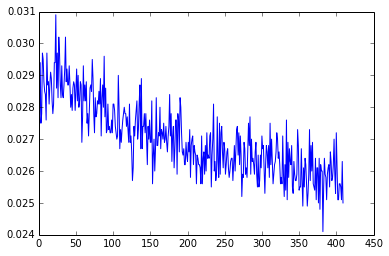

In [536]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.2_seed2_-1489281049/hook.txt'
! tail {path}
! ls -l {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

## Alpha 0.5

In [534]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488821707/hook.txt

198069.600326 1484 72.9052759529 0.021 0.0211
198186.929515 1485 72.8885048105 0.0207 0.0217
198326.31849 1486 72.9158896015 0.0204 0.0205
198454.583899 1487 72.8876280542 0.0214 0.0209
198572.54211 1488 72.8873970049 0.0211 0.0209
198692.187431 1489 72.8907201978 0.0211 0.0209
198819.198823 1490 72.9224296076 0.0207 0.0205
198944.166178 1491 72.866943509 0.0206 0.0208
199059.027008 1492 72.9111058898 0.0209 0.0213
199186.207072 1493 72.9320046438 0.0203 0.0208


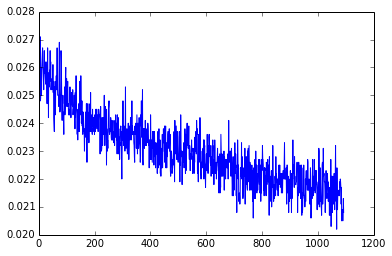

In [230]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488821707/hook.txt | awk '{print $5}'
plt.plot(data[400:])
plt.show()

In [533]:
! tail results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488809959/hook.txt 

209854.755776 1632 72.9140488012 0.02 0.0206
209975.980776 1633 72.9160516255 0.0195 0.0209
210097.240637 1634 72.9233233178 0.02 0.021
210223.57153 1635 72.9192881207 0.0197 0.0209
210344.834184 1636 72.9074541687 0.02 0.0214
210484.11199 1637 72.8995068081 0.0209 0.0213
210605.83095 1638 72.8746545655 0.0213 0.0212
210717.056651 1639 72.8943892667 0.0209 0.0204
210828.540054 1640 72.9000170031 0.0208 0.021
210961.282799 1641 72.8896823533 0.0204 0.0217


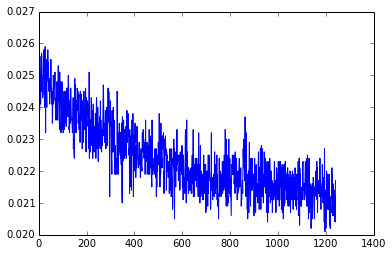

In [306]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed1_-1488809959/hook.txt  | awk '{print $5}'
plt.plot(data[400:])
plt.show()

Seed 2. PID 71157 cpu2 - killed

In [ ]:
# nohup python run_2layer_ssl.py 3000 2 > run_alpha05_3000_seed2.log &

221222.781396 798 73.3103103178 0.0217 0.0245
221386.103538 799 73.2868159409 0.023 0.0241
221585.279295 800 73.2586802333 0.023 0.0249
221849.585865 801 73.2793313133 0.0235 0.0244
222065.420284 802 73.2587276003 0.0227 0.0243
222262.071444 803 73.227941602 0.0231 0.0239
222462.194167 804 73.2764970967 0.0224 0.0238
222667.804172 805 73.2393930419 0.0225 0.024
222876.733662 806 73.247237494 0.0221 0.0236
223083.633491 807 73.2821989738 0.0221 0.0236
-rw-r--r-- 1 jbs47 mlsltm16 36616 Mar 14 15:05 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.5_seed2_-1489280829/hook.txt


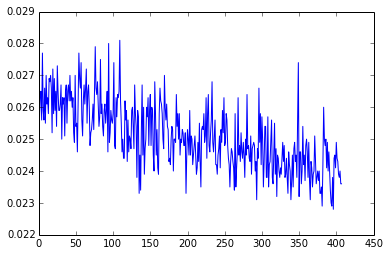

In [532]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.5_seed2_-1489280829/hook.txt'
! tail {path}
! ls -l {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

### Alpha 1.0

Changed alpha to 1.0 in run_2layer.py (then reseted to 0.1) and started with (PID 109123, cpu1): - killed 

In [ ]:
# nohup python run_2layer_ssl.py 3000 1 > run_alpha10_3000_seed1.log &

In [506]:
!  tail  results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha1.0_seed1_-1489086385/hook.txt
!  ls -l  results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha1.0_seed1_-1489086385/hook.txt

415356.186596 1604 72.9330472771 0.0194 0.0208
415482.945301 1605 72.8944469934 0.0201 0.0209
415618.043657 1606 72.9021735988 0.0211 0.0217
415754.439582 1607 72.891123435 0.0203 0.0218
415875.628014 1608 72.8748476647 0.0204 0.0219
416006.731986 1609 72.9084879575 0.0202 0.0213
416135.44453 1610 72.9133667498 0.0197 0.0202
416269.254816 1611 72.8778826717 0.02 0.0205
416369.195783 1612 72.9032368654 0.0195 0.0198
416432.34372 1613 72.9229102873 0.0202 0.0213
-rw-r--r-- 1 jbs47 mlsltm16 73954 Mar 14 14:47 results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha1.0_seed1_-1489086385/hook.txt


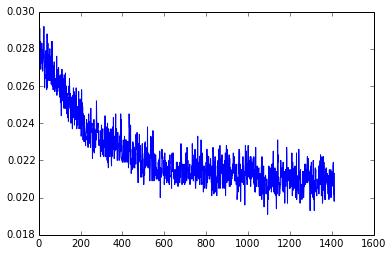

In [507]:
import matplotlib.pyplot as plt
data = ! cat results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha1.0_seed1_-1489086385/hook.txt  | awk '{print $5}'
plt.plot(data[200:])
plt.show()

PID  70990 cpu2- killed

In [ ]:
# nohup python run_2layer_ssl.py 3000 2 > run_alpha10_3000_seed2.log.log &

In [538]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha1.0_seed2_-1489280609/hook.txt'
! tail {path}

221775.987469 798 73.2507674117 0.0217 0.024
221982.439415 799 73.2444865688 0.0223 0.0238
222168.127414 800 73.3034746465 0.0226 0.0246
222360.530411 801 73.339312672 0.0227 0.0241
222558.217549 802 73.2651065979 0.0229 0.0247
222770.729414 803 73.2394385537 0.0222 0.0241
222969.36437 804 73.2665218889 0.0226 0.0244
223161.541535 805 73.2573897594 0.0228 0.0247
223365.393187 806 73.3519287977 0.0225 0.0249
223581.630689 807 73.2638463028 0.0223 0.0245


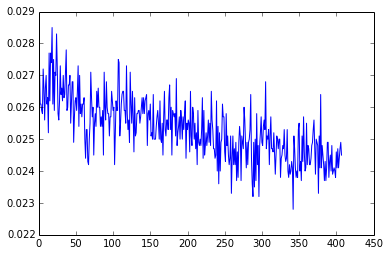

In [539]:
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

PID 71051 cpu2 - killed 

221500.516376 803 73.3056817404 0.0238 0.0249
221699.926461 804 73.2893988025 0.0226 0.0235
221961.089306 805 73.3072836807 0.0223 0.025
222210.744294 806 73.2939941409 0.0232 0.0244
222416.728888 807 73.3092722429 0.0222 0.0238
222624.549585 808 73.289758048 0.023 0.024
222823.405344 809 73.296148784 0.0221 0.0239
223033.293246 810 73.2875565586 0.0221 0.0241
223236.557104 811 73.2977680858 0.0229 0.0234
223434.354137 812 73.3050263203 0.0218 0.0233


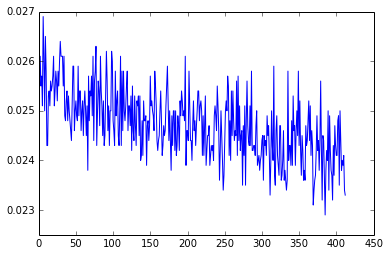

In [540]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha1.0_seed3_-1489280664/hook.txt'
! tail {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

Alpha 10.0 PID cpu2 55035

In [ ]:
# nohup python run_2layer_ssl.py 3000 1 > run_alpha100_3000_seed1.log &

tail: cannot open 'results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha10.0_seed1_-1489504914/hook.txt' for reading: No such file or directory
ls: cannot access results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha10.0_seed1_-1489504914/hook.txt: No such file or directory


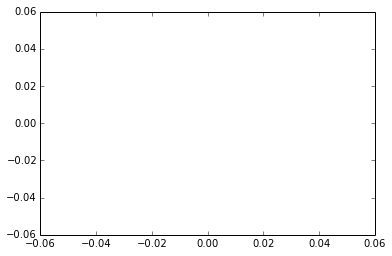

In [550]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha10.0_seed1_-1489504914/hook.txt'
! tail {path}
! ls -s {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

Alpha 0.01 PID cpu2 55136

In [ ]:
# nohup python run_2layer_ssl.py 3000 1 > run_alpha01_3000_seed1.log &

tail: cannot open 'results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.01_seed1_-1489505129/hook.txt' for reading: No such file or directory
ls: cannot access results/learn_yz_x_ss_mnist_2layer_50-(500,)_nlabeled3000_alpha0.01_seed1_-1489505129/hook.txt: No such file or directory


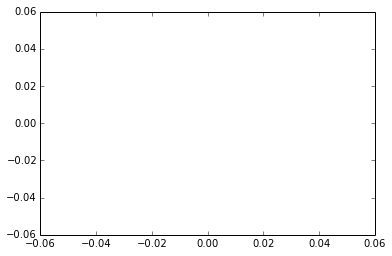

In [551]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(500,\)_nlabeled3000_alpha0.01_seed1_-1489505129/hook.txt'
! tail {path}
! ls -s {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

## Alphas with 100 labels:

Alpha 10.0 PID 69402 cpu1

In [ ]:
# nohup python run_2layer_ssl.py 100 1 > run_alpha100_100_seed1.log &

1124.65548491 20 81.783689985 0.2591 0.2756
1186.29579186 21 80.4132408775 0.2515 0.2698
1245.36367893 22 80.2018074489 0.2545 0.2736
1309.65515089 23 79.7219438943 0.2449 0.2644
1370.06947494 24 79.1532718412 0.2443 0.2607
1433.25147796 25 78.989141398 0.2436 0.2644
1497.37917805 26 78.5186307293 0.2365 0.2517
1562.58062887 27 78.362504452 0.2244 0.2388
1625.86276197 28 77.6482202113 0.226 0.2381
1691.05602503 29 77.4982456973 0.2243 0.24


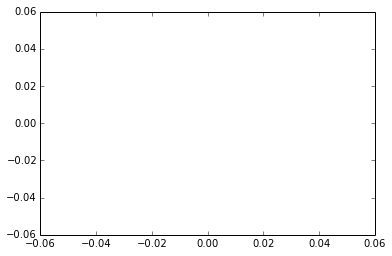

In [547]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha10.0_seed1_-1489503239/hook.txt'
! tail {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

Alpha 1.0 PID 126998 cpu1 

In [ ]:
# nohup python run_2layer_ssl.py 100 1 > run_alpha10_100_seed1.log &

805.392734051 12 74.2542836056 0.3445 0.3651
863.823827982 13 74.1415129576 0.3173 0.3363
923.238814831 14 73.9725285786 0.2943 0.3148
980.301327944 15 73.9166738569 0.279 0.3028
1040.01784992 16 73.7579161551 0.2661 0.2901
1103.57259488 17 73.7095263165 0.2566 0.278
1168.08759594 18 73.6028034398 0.2453 0.2659
1231.68537283 19 73.5898949266 0.2418 0.262
1294.42481494 20 73.4955437306 0.2301 0.2522
1359.89216805 21 73.3945390244 0.2256 0.2428


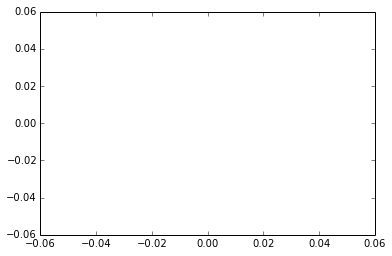

In [548]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha1.0_seed1_-1489503574/hook.txt'
! tail {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

Alpha 0.01 PID 54682 cpu2

In [ ]:
# nohup python run_2layer_ssl.py 100 1 > run_alpha01_100_seed1.log &

36.3759169579 0 72.9137052132 0.897 0.899
70.9887259007 1 72.6959911634 0.7934 0.8047
104.59077096 2 72.6788733824 0.7629 0.7666
144.04122901 3 72.680714801 0.8157 0.8131
177.711359024 4 72.6779684955 0.815 0.8112
212.015456915 5 72.6900026181 0.8042 0.7998
256.721643925 6 72.696057686 0.7998 0.7977
296.49316597 7 72.6838421382 0.7933 0.7931
338.897892952 8 72.6850584959 0.7814 0.7819
4 results/learn_yz_x_ss_mnist_2layer_50-(300,)_nlabeled100_alpha0.01_seed1_-1489504602/hook.txt


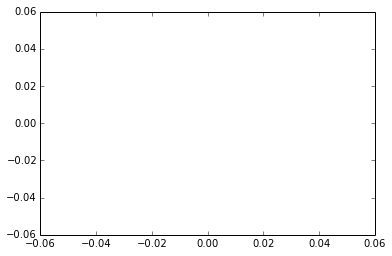

In [549]:
path = 'results/learn_yz_x_ss_mnist_2layer_50-\(300,\)_nlabeled100_alpha0.01_seed1_-1489504602/hook.txt'
! tail {path}
! ls -s {path}
import matplotlib.pyplot as plt
params = path + ' | awk \'{print $5}\''
data = ! cat {params}
# data3000 = []
# data3000.append(data[1000])
# print data[1000]
plt.plot(data[400:])
plt.show()

# Fully supervise

TODO: M1 + M2 stacked with fully supervised. To get the 0.96% error. Isnt the the m2 models itself with its z hidden enough? Wasnt the model inthe orignal test file like that?

Checking what performance gives this M2 only (or not ??) model: But it does not contain probability. so need to use the testing scirpt? Yes that is it,

In [69]:
! ls -l results/gpulearn_yz_x_svhn_300-\[500,\ 500\]-1488577059/w*

-rw-r--r-- 1 jbs47 mlsltm16 5266914 Mar  9 02:17 results/gpulearn_yz_x_svhn_300-[500, 500]-1488577059/w.ndict.tar.gz
-rw-r--r-- 1 jbs47 mlsltm16 5266831 Mar  9 01:41 results/gpulearn_yz_x_svhn_300-[500, 500]-1488577059/w_best.ndict.tar.gz


TODO: to test on SVHN need to modifythe scirpt.

For now train my on Mnist and check if can replicate (PID 121532).

In [ ]:
# python run_gpulearn_yz_x.py mnist

In [76]:
! ls -l results/gpulearn_yz_x_mnist_50-\(500,\ 500\)-1489015630

In [74]:
! python run_sl_fs.py mnist

Traceback (most recent call last):
  File "run_sl_fs.py", line 2, in <module>
    import anglepy
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/__init__.py", line 1, in <module>
    from anglepy.BNModel import *
  File "/remote/mlsalt-2016/jbs47/MLSALT4/nips14-ssl/anglepy/BNModel.py", line 2, in <module>
    import theano
ImportError: No module named theano


## Train 2D version of the fully supervised

CPU2 PID 24460

In [ ]:
# nohup python run_gpulearn_yz_x.py mnist > m2_2d.log &

In [270]:
! tail results/gpulearn_yz_x_mnist_2-\(500,\ 500\)-1489140992/hook.txt

51792.7234011 -113.163062748 -131.15482789
51839.599345 -113.169318627 -131.31794608
51894.7314799 -113.201015362 -131.279389754
51951.8863671 -113.169020294 -131.28204059
52008.493288 -113.219514754 -131.285904951
52065.051316 -113.191009834 -131.261711725
52123.2842331 -113.210736617 -131.319096093
52161.4651759 -113.258161767 -131.298081816
52195.767699 -113.282591788 -131.130566317
52242.3014569 -113.177750462 -131.245967489


Run the same for TSVM:

In [ ]:
nohup python run_gpulearn_yz_x.py mnist > m2_2d.log &

# Conditional generation

Generated based on fully suppervised model trained on raw data.

Analogy generated using the SVHN inside .. (best) based on random sampling. Cool example shows that even hard to recognise for human can be recognised and that handles correctly nearly mulitple digits (TODO: find out how does this work iwth vairance etc). Say that this is different from paper and using model we generated.

In [ ]:
! head results/analogies_new_svhn_1489014666/29_human.png

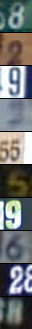

In [58]:
from IPython.display import Image
Image(filename='results/analogies_new_svhn_1489014666/29_human.png') 

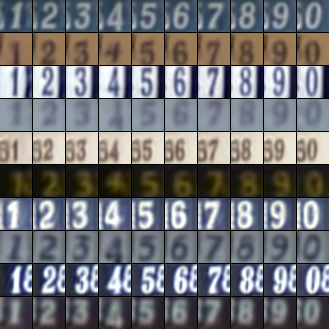

In [59]:
from IPython.display import Image
Image(filename='results/analogies_new_svhn_1489014666/29_machine.png') 

4 6 and 10 are hard to recognise but handles. Also some styels are not applied directly due tosmoothing ? the9

# Code analysis

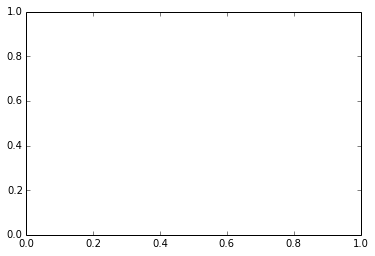

In [196]:
% matplotlib inline
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

In [197]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

In [199]:
import numpy as np
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

In [200]:
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')

In [203]:
plt.show()